# <center>WeRateDogs Data Analysis Project</center>

## Table of contents:
- `Phase one:` Data Wrangling.
- `Phase two:` Assesing.
- `Phase three:` Cleaning.
- `Phase four:` Visualization and Analysis.

# Phase one: Data Gathering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import requests
import os
import json
import sys
import json

%matplotlib inline

In [2]:
consumer_key = "XXXX"
consumer_secret = "XXXX"
access_token = 'XXXX'
access_secret = 'XXXX'
callback_url = 'oob'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_url)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
dictkeys = {'id','full_text','retweet_count','favorite_count'}

with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            exp_tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            data = exp_tweet._json
            
            dictionary = {key: data[key] for key in data.keys() & dictkeys}
            
            json.dump(dictionary, file)
            file.write('\n')
            
        except:
            print("unavailable tweet")


In [4]:
extra_archive = pd.read_json('tweet_json.txt',  lines = True)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request = requests.get(url)
request

<Response [200]>

In [6]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(request.content)

In [8]:
os.listdir(folder_name)

['image-predictions.tsv']

In [9]:
image_predictions = pd.read_csv('{}\image-predictions.tsv'.format(folder_name), sep = '\t')

# Phase two: Assesing.

### Assesing the `twitter_archive` table

In [10]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
twitter_archive.shape

(2356, 17)

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
twitter_archive.iloc[:,-4:].query('doggo != "None" or floofer != "None" or pupper != "None" or puppo != "None"').value_counts()

doggo  floofer  pupper  puppo
None   None     pupper  None     245
doggo  None     None    None      83
None   None     None    puppo     29
doggo  None     pupper  None      12
None   floofer  None    None       9
doggo  floofer  None    None       1
       None     None    puppo      1
dtype: int64

In [16]:
twitter_archive.tweet_id.nunique()

2356

In [17]:
twitter_archive.expanded_urls.str[:37].value_counts()

https://twitter.com/dog_rates/status/    2099
http://us.blastingnews.com/news/2017/       3
https://www.gofundme.com/3hgsuu0,http       2
https://www.gofundme.com/servicedogol       2
https://www.gofundme.com/surgeryforja       2
                                         ... 
https://twitter.com/rachel2195/status       1
https://twitter.com/rachaeleasler/sta       1
https://vine.co/v/ivV6Y37mH5Z               1
https://vine.co/v/iXQAm5Lrgrh               1
https://vine.co/v/iqIZFtOxEMB               1
Name: expanded_urls, Length: 182, dtype: int64

In [18]:
twitter_archive[twitter_archive.expanded_urls.str[:37] != 'https://twitter.com/dog_rates/status/'].expanded_urls.values

array(['https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
       'https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status/886736880519319552/photo/1',
       nan, 'https://twitter.com/4bonds2carbon/status/885517367337512960',
       'https://twitter.com/kaijohnson_19/status/883965650754039809', nan,
       nan, 'https://twitter.com/bbcworld/status/878599868507402241',
       'https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1',
       'https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1',
       'https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1',
 

In [19]:
twitter_archive[twitter_archive.expanded_urls.str[:37] != 'https://twitter.com/dog_rates/status/']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https:/...",13,10,Mingus,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


In [20]:
twitter_archive[twitter_archive.expanded_urls.isnull()].shape

(59, 17)

In [21]:
twitter_archive[twitter_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [22]:
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [23]:
twitter_archive.groupby('rating_denominator').count().rating_numerator

rating_denominator
0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_numerator, dtype: int64

In [24]:
twitter_archive.groupby('rating_numerator').count().rating_denominator

rating_numerator
0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archive.query('rating_numerator < 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Dante        1
Mabel        1
Pinot        1
Pubert       1
Stark        1
Name: name, Length: 957, dtype: int64

In [28]:
twitter_archive.groupby('tweet_id')[['rating_numerator', 'rating_denominator']].agg('sum')

,rating_numerator,rating_denominator
tweet_id,,
666020888022790149,8,10
666029285002620928,7,10
666033412701032449,9,10
666044226329800704,6,10
666049248165822465,5,10
...,...,...
891327558926688256,12,10
891689557279858688,13,10
891815181378084864,12,10


In [29]:
twitter_archive.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [30]:
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
getting          2
not              2
mad              2
actually         2
all              1
infuriating      1
light            1
his              1
old              1
officially       1
incredibly       1
such             1
by               1
life             1
this             1
my               1
space            1
unacceptable     1
Name: name, dtype: int64

In [31]:
twitter_archive.iloc[259,:]

tweet_id                                                     843235543001513987
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-03-18 22:59:54 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Tycho. She just had new wheels install...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/843235543...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [32]:
twitter_archive.iloc[45,:]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [33]:
twitter_archive[twitter_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


### Assesing the `image_predictions` table

In [34]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [35]:
image_predictions.shape

(2075, 12)

In [36]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
image_predictions.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [39]:
image_predictions[image_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Assesing the `extra_archive` table

In [40]:
extra_archive

,retweet_count,full_text,id,favorite_count
0,7511,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,35521
1,5576,This is Tilly. She's just checking pup on you....,892177421306343426,30749
2,3691,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,23111
3,7687,This is Darla. She commenced a snooze mid meal...,891689557279858688,38797
4,8295,This is Franklin. He would like you to stop ca...,891327558926688256,37061
...,...,...,...,...
2325,40,Here we have a 1949 1st generation vulpix. Enj...,666049248165822465,96
2326,126,This is a purebred Piers Morgan. Loves to Netf...,666044226329800704,266
2327,39,Here is a very happy pup. Big fan of well-main...,666033412701032449,110
2328,41,This is a western brown Mitsubishi terrier. Up...,666029285002620928,120


In [41]:
extra_archive.shape

(2330, 4)

In [42]:
extra_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   retweet_count   2330 non-null   int64 
 1   full_text       2330 non-null   object
 2   id              2330 non-null   int64 
 3   favorite_count  2330 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [43]:
extra_archive.describe()

,retweet_count,id,favorite_count
count,2330.000000,2.330000e+03,2330.000000
mean,2642.526180,7.418587e+17,7418.580258
std,4469.781118,6.820498e+16,11525.218705
min,1.000000,6.660209e+17,0.000000
25%,536.000000,6.782612e+17,1290.000000
50%,1234.500000,7.182408e+17,3224.000000
75%,3069.250000,7.986600e+17,9076.250000
max,75934.000000,8.924206e+17,153203.000000


### <font color='cyan'>Quality</font>

#### <font color='Pink'>Accuracy issues:</font>
##### <font color='Purple'> `twitter_archive` table</font>
- Name column contain false names like "a".
- rating containing decimal numbers caused an issue.

##### <font color='Purple'> `image_predictions` table</font>
- False predictions, predictions contain other than dog animals.

##### <font color='Purple'> `extra_archive` table</font>

#### <font color='Pink'>Validity issues:</font>
##### <font color='Purple'> `twitter_archive` table</font>
- the numerator and denominator values exceeds 10.

##### <font color='Purple'> `image_predictions` table</font>
##### <font color='Purple'> `extra_archive` table</font>

#### <font color='Pink'>Consistensy issues:</font>
##### <font color='Purple'> `twitter_archive` table</font>
- denominator column is of no use, the default value should be converted to 14.
- timestamp type is not correct.

##### <font color='Purple'> `image_predictions` table</font>
- dog breed name are not consistent

##### <font color='Purple'> `extra_archive` table</font>

#### <font color='Pink'>Completeness issues:</font>
##### <font color='Purple'> `twitter_archive` table</font>
- columns [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source] have lots of Null values.
- The rows which have a NaN value of expanded_url are just comments with no actual image.
- Some tweets are actually retweets and replies not original tweets


##### <font color='Purple'> `image_predictions` table</font>
##### <font color='Purple'> `extra_archive` table</font>

### <font color='cyan'>Tidiness</font>
- Tables must be joined at the end

##### <font color='Purple'>`twitter_archive` table</font>
- type of dog [doggo, floofer,	pupper,	puppo] should form one column.
- Edit column names to indicate a description of the content.
- table column names need to be edited to indicated description.

##### <font color='Purple'>`image_predictions` table</font>
- Table column names need to be edited to indicated description.
-  Most predicted breed for each prediction level should be created.

##### <font color='Purple'>`extra_archive` table</font>
- rename id column


# Phase three: Cleaning.

In [44]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
extra_archive_clean = extra_archive.copy()

### <font color='cyan'>Cleaning Quality issues</font>

#### `twitter_archive`: Name column contains false names like "a".

#### Define
Change lowercase names to None as they are wrong.

#### Code

In [45]:
twitter_archive_clean.loc[twitter_archive.name.str.islower(),'name'] = None
twitter_archive_clean.name.replace(regex=r'None', value= np.nan, inplace = True)

#### Test

In [46]:
twitter_archive_clean.name.value_counts()

Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
            ..
Dante        1
Humphrey     1
Gunner       1
Mabel        1
Moofasa      1
Name: name, Length: 931, dtype: int64

#### `twitter_archive`: Rating containing decimal numbers caused an issue.

#### Define
Extract the correct rating nominator from the text using Regex

#### Code

In [47]:
twitter_archive[twitter_archive.text.str.contains('(\d+\.\d*\/\d+)')].head(1)

C:\Users\Zoey\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None


In [48]:
correct_nominator_ratings = twitter_archive_clean.text.str.extract('(\d+\.\d*\/\d+)')

In [49]:
correct_nominator_ratings.dropna(inplace = True)

In [50]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [51]:
correct_nominator_ratings[0]

45       13.5/10
340      9.75/10
695      9.75/10
763     11.27/10
1689      9.5/10
1712    11.26/10
Name: 0, dtype: object

In [52]:
correct_nominator = correct_nominator_ratings[0].str.extract('(\d+\.\d+)')

In [53]:
correct_nominator[0] = correct_nominator[0].astype(float)

In [54]:
indices = correct_nominator.index.tolist()
indices

[45, 340, 695, 763, 1689, 1712]

In [55]:
values = correct_nominator[0].tolist()
values

[13.5, 9.75, 9.75, 11.27, 9.5, 11.26]

In [56]:
dictionary = dict(zip(indices,values))
dictionary

{45: 13.5, 340: 9.75, 695: 9.75, 763: 11.27, 1689: 9.5, 1712: 11.26}

In [57]:
twitter_archive_clean.rating_numerator.update(pd.Series(dictionary))

#### Test

In [58]:
twitter_archive_clean.loc[indices,'rating_numerator']

45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

#### `twitter_archive`: Some tweets are actually retweets and replies not original tweets

#### Define

drop rows which has a value of retweeted_status_id

#### Code

In [59]:
retweeted_tweets_indices = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index.tolist()

In [60]:
twitter_archive_clean.drop(retweeted_tweets_indices, inplace = True)

#### Test

In [61]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `twitter_archive`: The numerator and denominator values exceeds 10.

#### Define

numerators exceeding 14 will be converted to 14, denominator will be 14

#### Code

In [62]:
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator > 14,['rating_numerator']] = 14

#### Test

In [63]:
twitter_archive_clean.query('rating_numerator > 14')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `twitter_archive`: Denominator column is of no use, default value should be converted to 14

#### Define

drop denominator column

#### Code

In [64]:
twitter_archive_clean.drop(columns = ['rating_denominator'], inplace = True)

#### Test

In [65]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### `twitter_archive`: Columns [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source] have lots of Null values.

#### Define

drop the columns [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source] 

#### Code

In [66]:
twitter_archive_clean.drop(columns =
                           ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                            'retweeted_status_timestamp', 'source'], inplace = True)

#### Test

In [67]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### `twitter_archive`: The rows which have a NaN value of expanded_url are just comments with no actual image.

#### Define

drop rows which have a NaN value of expanded_urls

#### Code

In [68]:
twitter_archive_clean.dropna(subset = ['expanded_urls'], inplace = True)

#### Test

In [69]:
twitter_archive_clean.loc[twitter_archive_clean.expanded_urls.isnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo


#### `image_predictions`: False predictions, predictions contain values other than dog animals.

#### Define

drop each false row prediction

#### Code

In [70]:
false_predictions = ~((image_predictions_clean.p1_dog) | (image_predictions_clean.p2_dog) | (image_predictions_clean.p3_dog))
false_predictions_dog = image_predictions_clean[false_predictions].index.tolist()

In [71]:
image_predictions_clean.drop(false_predictions_dog, inplace = True)

In [72]:
image_predictions_clean = image_predictions_clean.reset_index(drop = True)

#### Test

In [73]:
image_predictions_clean[false_predictions]

C:\Users\Zoey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
17,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
18,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
21,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True
25,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1696,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False
1716,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
1717,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True
1723,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False


In [74]:
image_predictions_clean.head(18)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
9,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True


#### `twitter_archive`: Timestamp type is wrong.

#### Define

Convert timestamp to a datetime

#### Code

In [75]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2117 non-null   int64              
 1   timestamp         2117 non-null   datetime64[ns, UTC]
 2   text              2117 non-null   object             
 3   expanded_urls     2117 non-null   object             
 4   rating_numerator  2117 non-null   float64            
 5   name              1391 non-null   object             
 6   doggo             2117 non-null   object             
 7   floofer           2117 non-null   object             
 8   pupper            2117 non-null   object             
 9   puppo             2117 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 181.9+ KB


### <font color='cyan'>Cleaning tidiness issues</font>

#### `twitter_archive`: Type of dog [doggo, floofer, pupper, puppo] should form one column.

#### Define

Make one column that includes the type of dog.

#### Code

In [77]:
twitter_archive_clean['type_of_dog'] = twitter_archive_clean[
    ['doggo', 'floofer','pupper','puppo']].apply(lambda x: ', '.join(x), axis=1)

In [78]:
twitter_archive_clean.drop(columns = ['doggo', 'floofer','pupper','puppo'], inplace = True)

In [79]:
twitter_archive_clean = twitter_archive_clean.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')

In [80]:
twitter_archive_clean = twitter_archive_clean.replace(regex=r'', value= np.nan)

#### Test

In [81]:
twitter_archive_clean.type_of_dog.value_counts()

pupper            222
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: type_of_dog, dtype: int64

#### `image_predictions`: Most predicted breed for each prediction level should be created.

#### Define

Create top accurate predicted dog breed in a column and drop p1,p2,p3 related columns

#### Code

In [82]:
columns = ['p1_dog','p2_dog','p3_dog']
pred = []
preds = []

for index in range(image_predictions_clean.shape[0]):
    for col in columns:
        if image_predictions_clean.loc[index,col] == True:
            pred.append(col)
    preds.append(pred)
    pred = []

In [83]:
corresponding_columns = {'p1_dog': ['p1','p1_conf'], 'p2_dog': ['p2','p2_conf'], 'p3_dog': ['p3','p3_conf']}
prediction1 = []
conf1 = []


for index in range(image_predictions_clean.shape[0]):
    prediction1.append(image_predictions_clean.loc[index,corresponding_columns[preds[index][0]][0]])
    conf1.append(image_predictions_clean.loc[index,corresponding_columns[preds[index][0]][1]])

prediction1 = pd.Series(prediction1)
conf1 = pd.Series(conf1)

In [84]:
image_predictions_clean = pd.concat([image_predictions_clean, prediction1,conf1], axis=1, join = 'outer')

In [85]:
image_predictions_clean.rename(columns={0: "dog_breed_prediction", 1: "confidence_percentage"}, inplace = True)

In [86]:
image_predictions_clean.drop(columns=['p1', 'p2','p3','p1_conf','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], inplace = True)

#### Test

In [87]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,dog_breed_prediction,confidence_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### `image_predictions`: Dog names should be consistent

#### Define

replace _ with space

#### Code

In [88]:
image_predictions_clean.dog_breed_prediction = image_predictions_clean.dog_breed_prediction.replace(
    regex=r'(_)', value=' ').str.title()

#### Test

In [89]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,dog_breed_prediction,confidence_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311


#### `twitter_archive`: Table column names need to be edited to indicated description.

#### Define

Change column names ['expanded_urls, 'rating_numerator', 'name'] to ['image_url', 'rating/14', 'dog_name']

#### Code

In [90]:
twitter_archive_clean.rename(columns={'expanded_urls': "image_url", 'rating_numerator': "rating_numerator_out_of_14", 'name': "dog_name"}, inplace = True)

#### Test

In [91]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,image_url,rating_numerator_out_of_14,dog_name,type_of_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN


#### `image_predictions`: Table column names need to be edited to indicated description.

#### Define

Change jp_url column name to image_jpg_url

#### Code

In [92]:
image_predictions_clean.rename(columns={'jpg_url': "image_jpg_url"}, inplace = True)

#### Test

In [93]:
image_predictions_clean.head(20)

,tweet_id,image_jpg_url,img_num,dog_breed_prediction,confidence_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Golden Retriever,0.007959
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493
9,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden Retriever,0.775930


#### `extra_archive`: Rename id column and drop text

#### Code

In [94]:
extra_archive_clean.rename(columns={'id': "tweet_id"}, inplace = True)
extra_archive_clean.drop(columns = ['full_text'], inplace = True)

#### Test

In [95]:
extra_archive_clean.head()

,retweet_count,tweet_id,favorite_count
0,7511,892420643555336193,35521
1,5576,892177421306343426,30749
2,3691,891815181378084864,23111
3,7687,891689557279858688,38797
4,8295,891327558926688256,37061


#### `ALL`: Combine all the tables in one table

#### Code

In [96]:
twitter_archive_clean.shape

(2117, 7)

In [97]:
image_predictions_clean.shape

(1751, 5)

In [98]:
extra_archive_clean.shape

(2330, 3)

In [99]:
from functools import reduce
dfs = [twitter_archive_clean, image_predictions_clean, extra_archive_clean]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how='inner'), dfs)

#### Test

In [100]:
twitter_archive_master.head(5)

,tweet_id,timestamp,text,image_url,rating_numerator_out_of_14,dog_name,type_of_dog,image_jpg_url,img_num,dog_breed_prediction,confidence_percentage,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,5576,30749
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,3691,23111
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,7687,38797
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,8295,37061
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,2775,18685


In [101]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

# Phase four: Visualization and Analysis.

### insights to be concluded.
- top rated dog/s
- common dog breeds
- top common name for dogs
- top beloved dogs
- top retweeted dogs
- top beloved dogs type (doggo, pupper, puppo or floofer)

### Top rated dog/s

In [102]:
twitter_archive_master.query('rating_numerator_out_of_14 == 14.0').dog_breed_prediction.value_counts()

Golden Retriever               5
Pembroke                       4
Labrador Retriever             4
French Bulldog                 3
Soft-Coated Wheaten Terrier    2
Bedlington Terrier             1
Samoyed                        1
Gordon Setter                  1
Black-And-Tan Coonhound        1
Lakeland Terrier               1
Chow                           1
Borzoi                         1
Rottweiler                     1
Bloodhound                     1
West Highland White Terrier    1
Old English Sheepdog           1
Chihuahua                      1
Siberian Husky                 1
Great Pyrenees                 1
Eskimo Dog                     1
Pomeranian                     1
Standard Poodle                1
Irish Setter                   1
Name: dog_breed_prediction, dtype: int64

### Common dog breeds.

In [103]:
twitter_archive_master.dog_breed_prediction.value_counts()

Golden Retriever        158
Labrador Retriever      106
Pembroke                 95
Chihuahua                91
Pug                      62
                       ... 
Irish Wolfhound           1
Scotch Terrier            1
Japanese Spaniel          1
Bouvier Des Flandres      1
Standard Schnauzer        1
Name: dog_breed_prediction, Length: 113, dtype: int64

### top common name for dogs.

In [104]:
twitter_archive_master.dog_name.value_counts()

Cooper     10
Charlie     9
Oliver      9
Tucker      9
Lucy        9
           ..
Mona        1
Dex         1
Beemo       1
Amy         1
Atticus     1
Name: dog_name, Length: 830, dtype: int64

### Top beloved dogs.

In [105]:
twitter_archive_master.groupby(['dog_breed_prediction']).favorite_count.sum().sort_values(ascending=False)

dog_breed_prediction
Golden Retriever      1774007
Labrador Retriever    1109991
Pembroke               952738
Chihuahua              706641
French Bulldog         552943
                       ...   
Brabancon Griffon        2363
Groenendael              2065
Standard Schnauzer       1800
Irish Wolfhound          1364
Japanese Spaniel         1188
Name: favorite_count, Length: 113, dtype: int64

### Top retweeted dogs

In [106]:
twitter_archive_master.groupby(['dog_breed_prediction']).retweet_count.sum().sort_values(ascending=False)

dog_breed_prediction
Golden Retriever      509962
Labrador Retriever    341033
Pembroke              252927
Chihuahua             225773
Samoyed               166367
                       ...  
Brabancon Griffon        748
Irish Wolfhound          702
Entlebucher              600
Groenendael              478
Japanese Spaniel         388
Name: retweet_count, Length: 113, dtype: int64

### Top beloved dogs type (doggo, pupper, puppo or floofer)

In [107]:
twitter_archive_master.groupby(['type_of_dog']).favorite_count.sum().sort_values(ascending=False)

type_of_dog
pupper            1150341
doggo              995635
puppo              431035
doggo, pupper      102916
floofer             82773
doggo, puppo        43755
doggo, floofer      15591
Name: favorite_count, dtype: int64

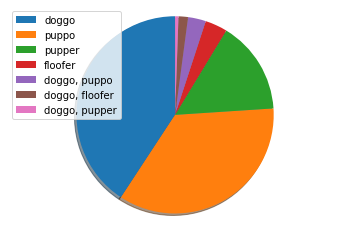

In [108]:
labels = twitter_archive_master.type_of_dog.unique().tolist()[1:]
sizes = twitter_archive_master.groupby(['type_of_dog']).favorite_count.sum().sort_values(ascending=False).tolist()
# plt.bar(labels, values,width=10)

# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,shadow=True, startangle=90)

plt.legend(labels)
ax1.axis('equal')

plt.show()